In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')
plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
file_in = r'D:\Projects\Pr\3517.10\20170804_Piezometerdata\BATsensor_ProefstrookI.csv'
df = pd.read_csv(file_in, skiprows=0, encoding='cp1252', header=[1,2],tupleize_cols=True)

In [3]:
df.columns = pd.MultiIndex.from_tuples(df.columns)
df.head()

BAT I-1                                                       \
   103834         Date/Time       [Pa]       [°C]    Barometer   
0     NaN  10/29/2015 18:58  98326.766  11.834122  102379.5430   
1     NaN  10/29/2015 19:00  98312.000  11.823013  102406.5095   
2     NaN  10/29/2015 19:05  98252.242  11.805145  102406.5095   
3     NaN  10/29/2015 19:10  98204.922  11.788788  102406.5095   
4     NaN  10/29/2015 19:15  98140.953  11.777679  102421.2185   

                                             BAT I-2                    \
  Barometer gecorrigeerd voor barodrukken WL  103837         Date/Time   
0                                101977.5430     NaN  10/29/2015 18:54   
1                                102004.5095     NaN  10/29/2015 18:55   
2                                102004.5095     NaN  10/29/2015 19:00   
3                                102004.5095     NaN  10/29/2015 19:05   
4                                102019.2185     NaN  10/29/2015 19:10   

                            ...      BAT I-5                               \
        [Pa]       [°C]     ...       103830         Date/Time       [Pa]   
0  101469.12  11.995178     ...          NaN  10/29/2015 18:56  90921.703   
1  101474.16  11.997879     ...          NaN  10/29/2015 19:00  90846.141   
2  101498.04  11.988159     ...          NaN  10/29/2015 19:05  90755.297   
3  101500.43  11.983002     ...          NaN  10/29/2015 19:10  90679.320   
4  101519.54  11.977066     ...          NaN  10/29/2015 19:15  90641.875   

                          BAT I-6                                          \
        [°C]    Barometer  103831         Date/Time       [Pa]       [°C]   
0  11.846207  102379.5430     NaN  10/29/2015 18:53  102749.41  12.213104   
1  11.812958  102406.5095     NaN  10/29/2015 18:55  102799.23  12.200485   
2  11.784988  102406.5095     NaN  10/29/2015 19:00  102889.52  12.186523   
3  11.754898  102406.5095     NaN  10/29/2015 19:05  102903.20  12.162628   
4  11.734924  102421.2185     NaN  10/29/2015 19:10  102912.88  12.153656   

                
     Barometer  
0  102379.5430  
1  102379.5430  
2  102406.5095  
3  102406.5095  
4  102406.5095  

[5 rows x 31 columns]

In [4]:
df_col_BAT = ['BAT I-1','BAT I-2','BAT I-3','BAT I-4','BAT I-5','BAT I-6']
df_col_par = ['Date/Time',' [Pa]',' [°C]','Barometer']

In [5]:
periods = {
    'I_1': [
        ('start_dt', '2015-11-04 11:29'),
        ('end_dt',   '2015-11-04 12:00'),
        ('xmin',     'none'),
        ('xmax',     'none'),
    ],
    'I_5': [
        ('start_dt', '2015-11-04 13:10'),
        ('end_dt',   '2015-11-04 15:20'),
        ('xmin',     '2015-11-04 14:42'),
        ('xmax',     '2015-11-04 14:49'),        
    ],
    'I_10': [
        ('start_dt', '2015-11-04 15:44'),
        ('end_dt',   '2015-11-04 18:00'),
        ('xmin',     '2015-11-04 16:37'),
        ('xmax',     '2015-11-04 16:45'),                
    ],    
    'I_25': [
        ('start_dt', '2015-11-05 09:59'),
        ('end_dt',   '2015-11-05 12:30'),
        ('xmin',     '2015-11-05 11:05'),
        ('xmax',     '2015-11-05 11:27'),                
    ],
    'I_50': [
        ('start_dt', '2015-11-05 13:14'),
        ('end_dt',   '2015-11-05 13:35'),
        ('xmin',     'none'),
        ('xmax',     'none'),
    ],    
#     'III_hm': [
#         ('start_dt', '2015-11-05 13:40'),
#         ('end_dt',   '2015-11-05 14:20'),
#     ],
#     'III_25': [
#         ('start_dt', '2015-11-05 15:19'),
#         ('end_dt',   '2015-11-05 17:10'),
#     ]
}

I_50
BAT I-1
BAT I-2
BAT I-3
BAT I-4
BAT I-5
BAT I-6
datetime64[ns] None


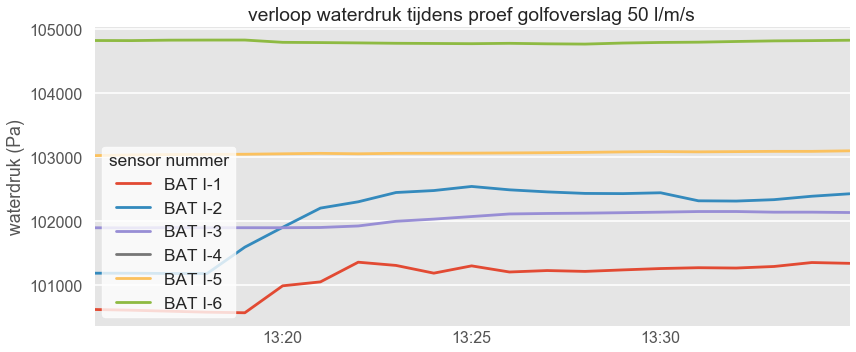

I_1
BAT I-1
BAT I-2
BAT I-3
BAT I-4
BAT I-5
BAT I-6
datetime64[ns] None


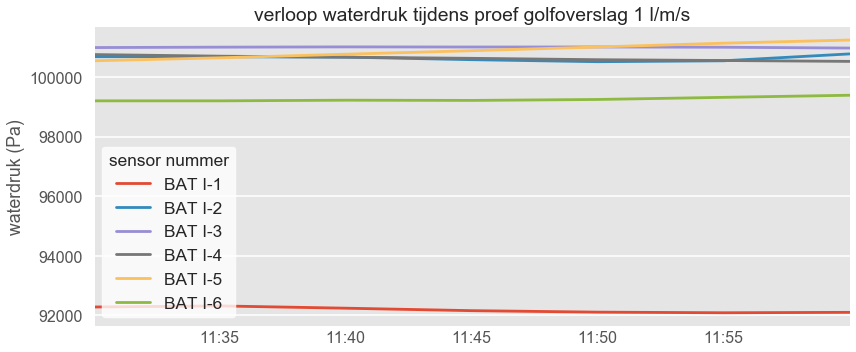

I_5
BAT I-1
BAT I-2
BAT I-3
BAT I-4
BAT I-5
BAT I-6
datetime64[ns] None


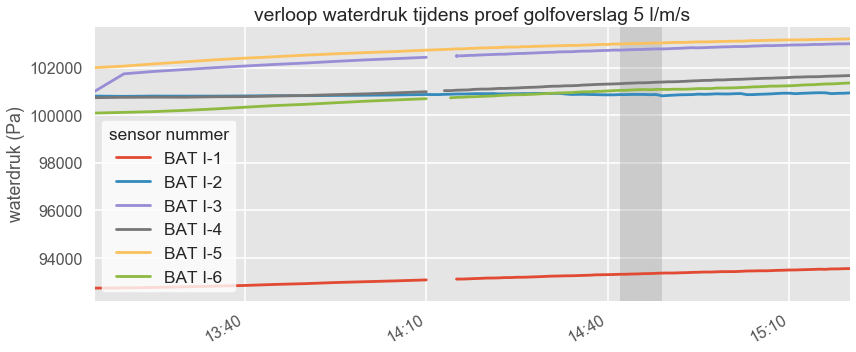

I_10
BAT I-1
BAT I-2
BAT I-3
BAT I-4
BAT I-5
BAT I-6
datetime64[ns] None


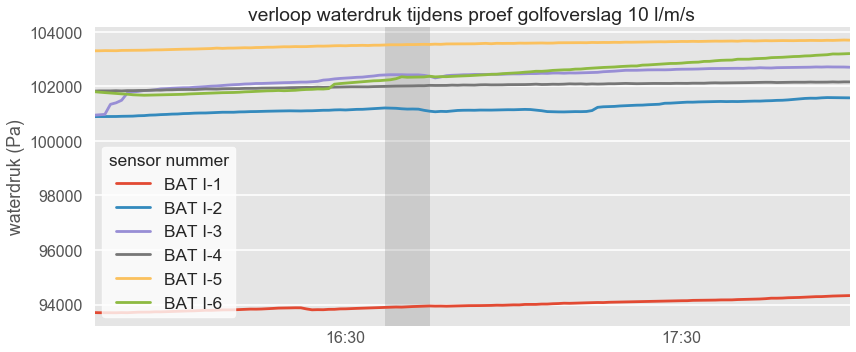

I_25
BAT I-1
BAT I-2
BAT I-3
BAT I-4
BAT I-5
BAT I-6
datetime64[ns] None


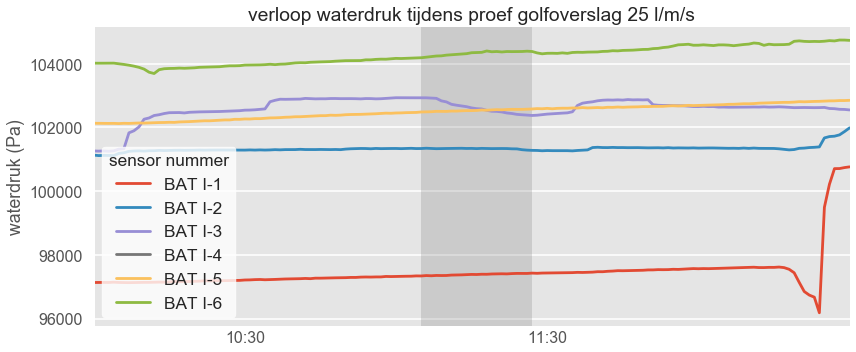

In [14]:
from matplotlib.dates import DateFormatter
from matplotlib import dates

for per in periods:
    print (per)
    start_dt = periods[per][0][1] # start_dt
    end_dt   = periods[per][1][1] # end_dt
    
    xmin = periods[per][2][1] #xmin
    xmax = periods[per][3][1] #xmax
    
    

    df_comb = pd.DataFrame()
    for col in ['BAT I-1','BAT I-2','BAT I-3','BAT I-4','BAT I-5','BAT I-6']:
        print(col)
        df.loc[:,(col,df_col_par[0])] = pd.to_datetime(df[(col,df_col_par[0])], format='%m/%d/%Y %H:%M', errors='raise')
        period = (df[(col,df_col_par[0])] > pd.Timestamp(start_dt)) & (df[(col,df_col_par[0])] <= pd.Timestamp(end_dt))    
        df_sel = pd.DataFrame(data=df[(col,df_col_par[1])].loc[period].values, index=df[(col,df_col_par[0])].loc[period].values, columns=[col])
        df_comb = df_comb.join(df_sel, how='outer')

    df_comb.index = pd.to_datetime(df_comb.index.astype(str), format='%Y-%m-%d %H:%M')
    print (df_comb.index.dtype, df_comb.index.freq)
    fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(12,5))
    df_comb.plot(title='verloop waterdruk tijdens proef golfoverslag '+str(per[2::])+' l/m/s', ax=ax)
    ax.set_ylabel('waterdruk (Pa)')
    if xmin != xmax:
        ax.axvspan(xmin=xmin, xmax=xmax, facecolor='grey', alpha=0.25)

    
    #xaxis datetime represenation
    formatter = DateFormatter("%H:%M")
    minutes = dates.MinuteLocator(interval=30)
    ax.xaxis.set_major_locator(minutes)
    ax.xaxis.set_major_formatter(formatter)

    #legend
    leg = ax.legend(fontsize = 'xx-large',frameon=True, loc=3)
    leg.set_title(title='sensor nummer', prop = {'size':'xx-large'})
    frame = leg.get_frame()
    frame.set_color('white')

    #show
    plt.tight_layout()
    plt.savefig(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.png', dpi=100)
    plt.show()

    if xmin != xmax:    
        df_comb.loc[:,'pauze'] = (df_comb.index > xmin) & (df_comb.index <= xmax)
    else:
        df_comb.loc[:,'pauze'] = False

    df_comb.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-10-18 plots//waterdruk_'+per+'.csv')